# Telecom Stocks Analysis

## Project Overview
This project anzeyses the stock performance of three major telecom companies: AT&T(T), T-Mobile (TMUS), and Verizon (VZ) over a one-year period. The analysis includes trend analysis, volatility assessment, correlation studies, and performance comparisons to provide insights for potential investors.

## Data Source
The data used in this analysis is sourced from Python with the yfinance library.
This library allows you to easily download historical market dm a fro financempanies.
This data contains daily trading information including opening, closing, high, and low as well as trading volumes , corporate actions and earnings data for each company.for each

By: Yara , Hunter, Adolphus, Sanjana, company.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import time
import yfinance as yf
import seaborn as sns
import mplfinance as mpf
from datetime import datetime, timedelta 

In [2]:
# Define the ticker symbols
tickers = ['T', 'TMUS', 'VZ']

# Set the start and end dates
end_date = pd.Timestamp.today()
start_date = end_date - pd.DateOffset(years=1)

# Create an empty dictionary to store data
data = {}

# Fetch the data for each ticker
for ticker in tickers:
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    data[ticker] = stock_data

# Convert the dictionary to a DataFrame
df = pd.concat(data, axis=1)


# save the data to a CSV file
df.to_csv('cell_phone_companies_trading_data.csv')

# Display the dataFrame
df

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


T                                                        \
                 Open       High        Low      Close  Adj Close    Volume   
Date                                                                          
2023-08-14  14.310000  14.370000  14.180000  14.260000  13.345894  26901400   
2023-08-15  14.200000  14.210000  14.100000  14.140000  13.233586  26393600   
2023-08-16  14.150000  14.190000  14.010000  14.100000  13.196151  29440300   
2023-08-17  14.130000  14.160000  13.990000  14.010000  13.111919  36036700   
2023-08-18  13.970000  14.140000  13.950000  14.050000  13.149356  32206300   
...               ...        ...        ...        ...        ...       ...   
2024-08-08  19.260000  19.480000  19.209999  19.400000  19.400000  25588100   
2024-08-09  19.389999  19.600000  19.270000  19.490000  19.490000  22819600   
2024-08-12  19.540001  19.559999  19.299999  19.430000  19.430000  22979900   
2024-08-13  19.420000  19.559999  19.360001  19.520000  19.520000  21508000   
2024-08-14  19.480000  19.660000  19.421400  19.629999  19.629999  15958742   

                  TMUS                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2023-08-14  138.949997  139.889999  138.160004  139.500000  137.815735   
2023-08-15  138.710007  139.600006  138.179993  138.580002  136.906845   
2023-08-16  138.929993  139.679993  138.220001  138.250000  136.580826   
2023-08-17  138.660004  139.130005  136.169998  136.369995  134.723511   
2023-08-18  136.330002  137.369995  135.630005  136.139999  134.496292   
...                ...         ...         ...         ...         ...   
2024-08-08  190.440002  193.839996  190.000000  193.610001  193.610001   
2024-08-09  193.669998  194.380005  192.110001  194.199997  194.199997   
2024-08-12  194.199997  195.240005  193.259995  194.949997  194.949997   
2024-08-13  195.699997  195.929993  193.880005  195.330002  195.330002   
2024-08-14  194.979996  197.028702  194.485001  196.490005  196.490005   

                            VZ                                              \
             Volume       Open       High        Low      Close  Adj Close   
Date                                                                         
2023-08-14  3117800  33.189999  33.590000  33.139999  33.560001  31.286766   
2023-08-15  2664500  33.349998  33.509998  33.209999  33.259998  31.007082   
2023-08-16  2755600  33.299999  33.639999  33.139999  33.270000  31.016407   
2023-08-17  3916300  33.360001  33.480000  32.849998  33.060001  30.820635   
2023-08-18  3602600  32.860001  33.419998  32.860001  33.180000  30.932503   
...             ...        ...        ...        ...        ...        ...   
2024-08-08  5437100  40.279999  40.790001  40.250000  40.520000  40.520000   
2024-08-09  2802200  40.490002  40.799999  40.029999  40.750000  40.750000   
2024-08-12  2870800  40.950001  41.000000  40.310001  40.529999  40.529999   
2024-08-13  3736900  40.650002  40.799999  40.349998  40.779999  40.779999   
2024-08-14  3098329  40.599998  41.095001  40.490002  40.900002  40.900002   

                      
              Volume  
Date                  
2023-08-14  17934000  
2023-08-15  15528600  
2023-08-16  17395100  
2023-08-17  19128000  
2023-08-18  21718100  
...              ...  
2024-08-08  13237100  
2024-08-09  11818700  
2024-08-12  11099000  
2024-08-13  15349400  
2024-08-14   7811187  

[253 rows x 18 columns]

In [3]:
# number of rows and columns
df.shape

(253, 18)

In [4]:
df.info

<bound method DataFrame.info of                     T                                                        \
                 Open       High        Low      Close  Adj Close    Volume   
Date                                                                          
2023-08-14  14.310000  14.370000  14.180000  14.260000  13.345894  26901400   
2023-08-15  14.200000  14.210000  14.100000  14.140000  13.233586  26393600   
2023-08-16  14.150000  14.190000  14.010000  14.100000  13.196151  29440300   
2023-08-17  14.130000  14.160000  13.990000  14.010000  13.111919  36036700   
2023-08-18  13.970000  14.140000  13.950000  14.050000  13.149356  32206300   
...               ...        ...        ...        ...        ...       ...   
2024-08-08  19.260000  19.480000  19.209999  19.400000  19.400000  25588100   
2024-08-09  19.389999  19.600000  19.270000  19.490000  19.490000  22819600   
2024-08-12  19.540001  19.559999  19.299999  19.430000  19.430000  22979900   
2024-08-13  19.42000

In [5]:
# Load the data
df = pd.read_csv("cell_phone_companies_trading_data.csv", header=[0,1], index_col=0)
df.index = pd.to_datetime(df.index)

# Separate data for each company
companies = ['T', 'TMUS', 'VZ']
data = {company: df[company].copy() for company in companies}

# display data
data

{'T':                  Open       High        Low      Close  Adj Close    Volume
 Date                                                                       
 2023-08-14  14.310000  14.370000  14.180000  14.260000  13.345894  26901400
 2023-08-15  14.200000  14.210000  14.100000  14.140000  13.233586  26393600
 2023-08-16  14.150000  14.190000  14.010000  14.100000  13.196151  29440300
 2023-08-17  14.130000  14.160000  13.990000  14.010000  13.111919  36036700
 2023-08-18  13.970000  14.140000  13.950000  14.050000  13.149356  32206300
 ...               ...        ...        ...        ...        ...       ...
 2024-08-08  19.260000  19.480000  19.209999  19.400000  19.400000  25588100
 2024-08-09  19.389999  19.600000  19.270000  19.490000  19.490000  22819600
 2024-08-12  19.540001  19.559999  19.299999  19.430000  19.430000  22979900
 2024-08-13  19.420000  19.559999  19.360001  19.520000  19.520000  21508000
 2024-08-14  19.480000  19.660000  19.421400  19.629999  19.629999  159

# Trend Analysis
   - A line plot showing the closing prices of all three stocks over the year.
   - This visualizes the overall price trends and allows for easy comparison between the companies



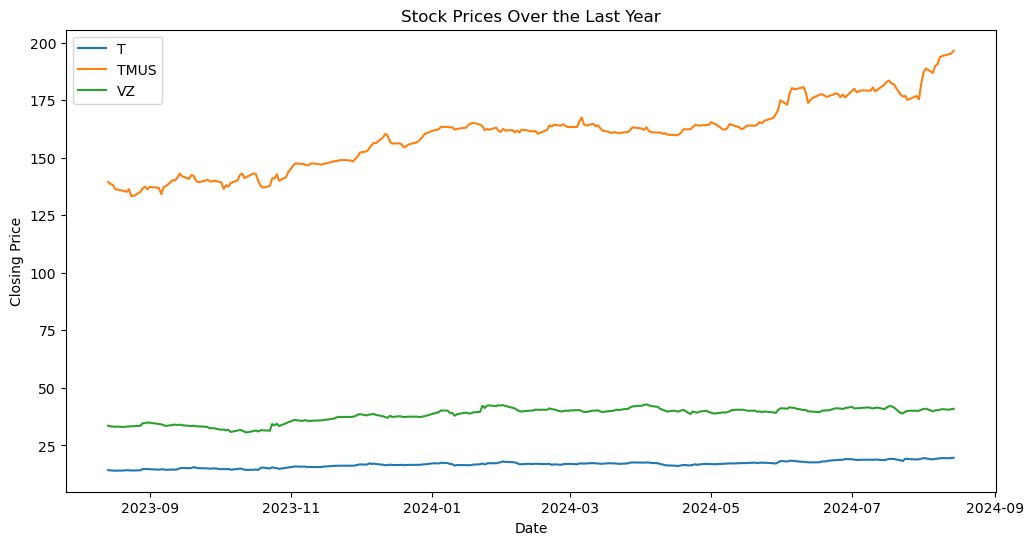

In [6]:
# Trend Analysis
plt.figure(figsize=(12, 6))
for company in companies:
    plt.plot(data[company]['Close'], label=company)
plt.title('Stock Prices Over the Last Year')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()

# save to file
plt.savefig('Images/stock_prices.png')

plt.show()




# Conclusion: 
- Compared to VZ and T, TMUS has a better closing price and faster growth rate. VZ and T appear to have a constant growth rate 

# Moving Averages
   - Calculation and visualization of 20-day moving averages for each stock. It takes a certain day and finds a tredn over 20 days.             (takes 10 days before the day and 10 days after and calculates the average)
   - Helps in identifying short-term trends and smoothing out price fluctuations. (if there are any unusual jum ipsn the ta a it will show



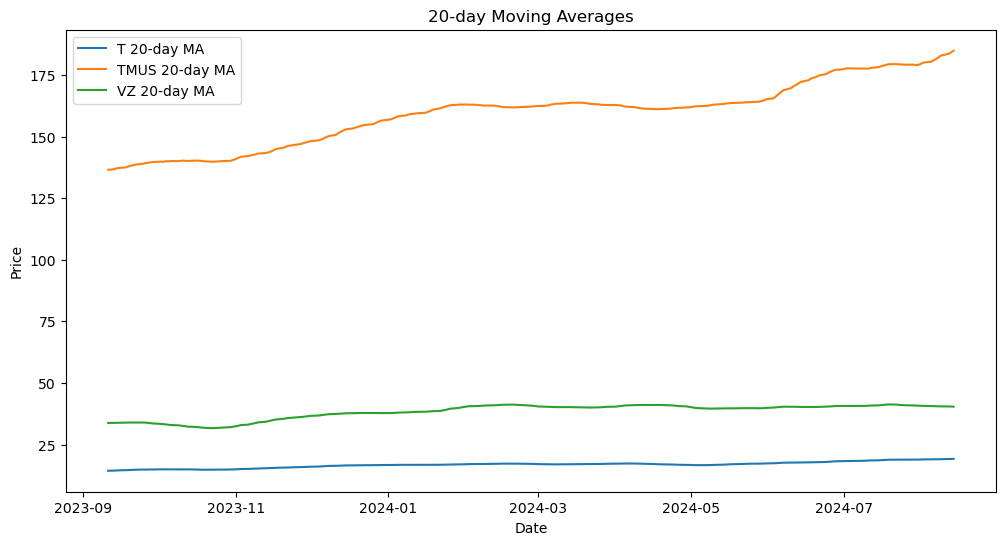

In [7]:
# Moving Averages plot
window = 20
plt.figure(figsize=(12, 6))
for company in companies:
    ma = data[company]['Close'].rolling(window=window).mean()
    plt.plot(ma, label=f"{company} {window}-day MA")
plt.title(f'{window}-day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# save to file
plt.savefig('Images/stock_price_Avg.png')

plt.show()

# Conclusion: 
- Even with 20 days in consideration, it's clear that TMUS has a higher closing price compared to the other companies and we can see that all stocks are growing.

# Daily Returns
   - Calculation of daily returns for each stock. (The average change from one day to another. The percentage value is between 0-1
   - Used in subsequent analyses for volatility and correlation.


In [8]:
# Show Daily Returns
for company in companies:
    data[company].loc[:, 'Daily_Return'] = data[company]['Close'].pct_change()

# print data with the new added column daily return 
print(data)

{'T':                  Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2023-08-14  14.310000  14.370000  14.180000  14.260000  13.345894  26901400   
2023-08-15  14.200000  14.210000  14.100000  14.140000  13.233586  26393600   
2023-08-16  14.150000  14.190000  14.010000  14.100000  13.196151  29440300   
2023-08-17  14.130000  14.160000  13.990000  14.010000  13.111919  36036700   
2023-08-18  13.970000  14.140000  13.950000  14.050000  13.149356  32206300   
...               ...        ...        ...        ...        ...       ...   
2024-08-08  19.260000  19.480000  19.209999  19.400000  19.400000  25588100   
2024-08-09  19.389999  19.600000  19.270000  19.490000  19.490000  22819600   
2024-08-12  19.540001  19.559999  19.299999  19.430000  19.430000  22979900   
2024-08-13  19.420000  19.559999  19.360001  19.520000  19.520000  21508000   
2024-08-14  19.480000  19.660000  19.421400  1

# Volatility Analysis
   - Computation of annualized volatility for each stock.
   - Visualized using a bar plot to compare the relative risk of each stock
   - The change in stock. If the change gap is huge, it means that the stock is risky and not stable (this can be good for high-risk clients      over a short period of time. If the Change is small, it’s more stable less risky stock)


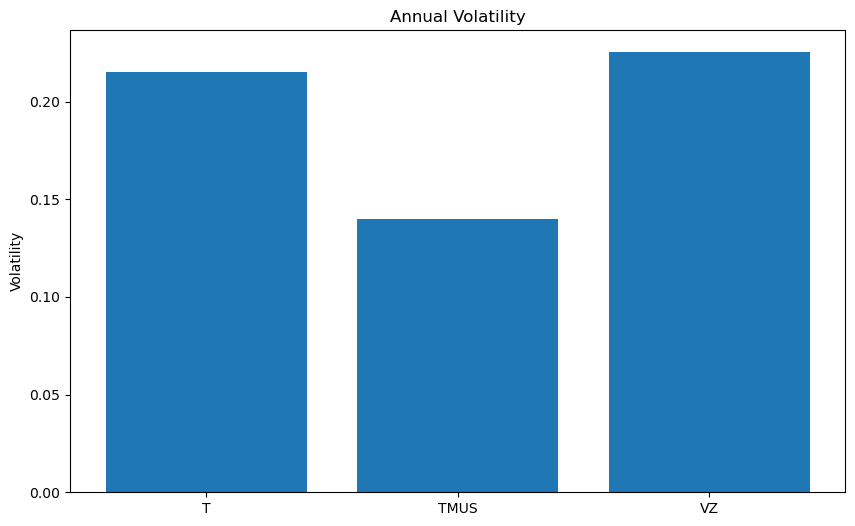

In [9]:
# Volatility
volatility = {company: data[company]['Daily_Return'].std() * np.sqrt(252) for company in companies}

# Plot Volatility
plt.figure(figsize=(10, 6))
plt.bar(volatility.keys(), volatility.values())
plt.title('Annual Volatility')
plt.ylabel('Volatility')
plt.grid(False)

# save to file
plt.savefig('Images/Volatility.png')

plt.show()


# Conclusion: 
- TMUS is the least volatile stock, therefore the least risky to invest in. While VZ is the most Volatile, therefore higher risk, greater shift in stock prices.

# Correlation Analysis
   - Calculation of correlation between the daily returns of the three stocks. (to measure the size of the stock with the other                 companies)
   - Visualized using a heatmap to show the strength and direction of relationships between the stocks. (Same colour means they are similar     and 100% matching stocks)


In [10]:
# Show Correlation Analysis
corr_returns = pd.DataFrame({company: data[company]['Daily_Return'] for company in companies})
correlation = corr_returns.corr()

corr_returns

,T,TMUS,VZ
Date,,,
2023-08-14,NaN,NaN,NaN
2023-08-15,-0.008415,-0.006595,-0.008939
2023-08-16,-0.002829,-0.002381,0.000301
2023-08-17,-0.006383,-0.013599,-0.006312
2023-08-18,0.002855,-0.001687,0.003630
...,...,...,...
2024-08-08,0.007792,0.015846,0.005958
2024-08-09,0.004639,0.003047,0.005676
2024-08-12,-0.003078,0.003862,-0.005399


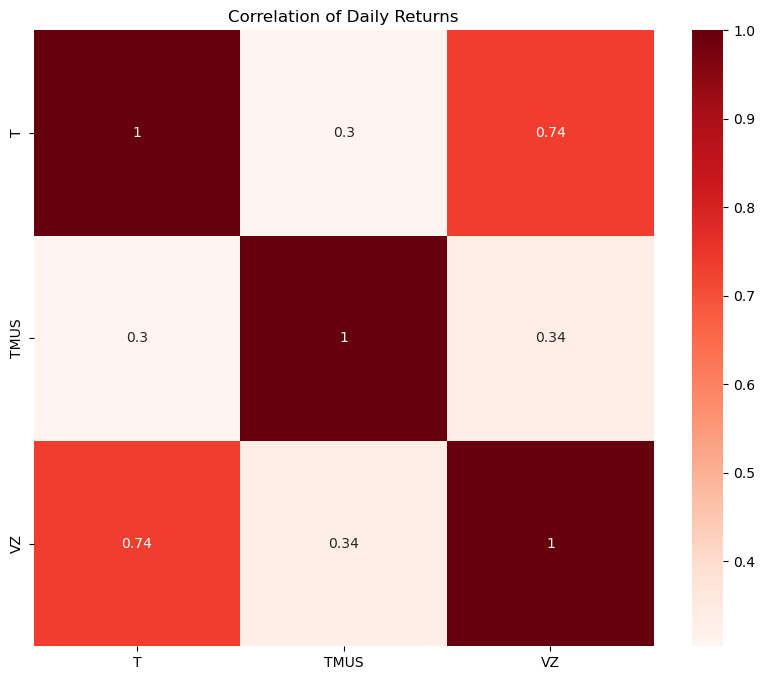

In [11]:
# plot heatmap correlation of daily returns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='Reds')
plt.title('Correlation of Daily Returns')
plt.grid(False)

# save to file
plt.savefig('Images/correlation.png')

plt.show()

# Conclusion: 
  - T - TMUS has a weak positive correlation
  - T - VZ strong positive correlation
  - TMUS - VZ weak positive correlation

# Cumulative Returns
   - Calculation and visualization of cumulative returns for each stock. (Return is between 0-1 so we need to add 1 to    the return before calculating the cum to remove the decimal 
   - Provides insight into overall performance over the entire piddio.



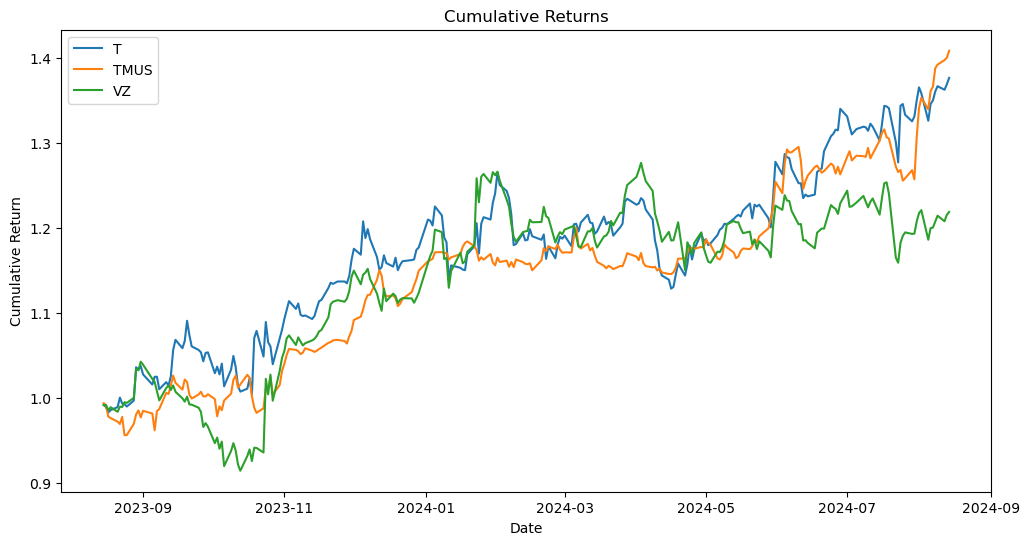

In [12]:
# calculate and plot Cumulative Returns
cum_returns = (1 + corr_returns).cumprod()

plt.figure(figsize=(12, 6))
for company in companies:
    plt.plot(cum_returns[company], label=company)
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()

# save to file
plt.savefig('Images/cum_returns.png')

plt.show()

# Conclusion: 
- With T and VZ stocks have faster and larger movments Cum returns. There isn't a stock with a significantly higher return. TMUS has a slight edge on returns.

# Candlestick Charts
   - Creation of candlestick charts for each company. (This is one of the main Charts used to analyse stock market        data)
   - Offers a detailed view of daily price movements, including opening, closing, high, and low prices


In [13]:
# show plot_data for candelstick plot
for company in companies:
    # Prepare data for mplfinance
    plot_data = data[company].copy()

plot_data

,Open,High,Low,Close,Adj Close,Volume,Daily_Return
Date,,,,,,,
2023-08-14,33.189999,33.590000,33.139999,33.560001,31.286766,17934000,NaN
2023-08-15,33.349998,33.509998,33.209999,33.259998,31.007082,15528600,-0.008939
2023-08-16,33.299999,33.639999,33.139999,33.270000,31.016407,17395100,0.000301
2023-08-17,33.360001,33.480000,32.849998,33.060001,30.820635,19128000,-0.006312
2023-08-18,32.860001,33.419998,32.860001,33.180000,30.932503,21718100,0.003630
...,...,...,...,...,...,...,...
2024-08-08,40.279999,40.790001,40.250000,40.520000,40.520000,13237100,0.005958
2024-08-09,40.490002,40.799999,40.029999,40.750000,40.750000,11818700,0.005676
2024-08-12,40.950001,41.000000,40.310001,40.529999,40.529999,11099000,-0.005399


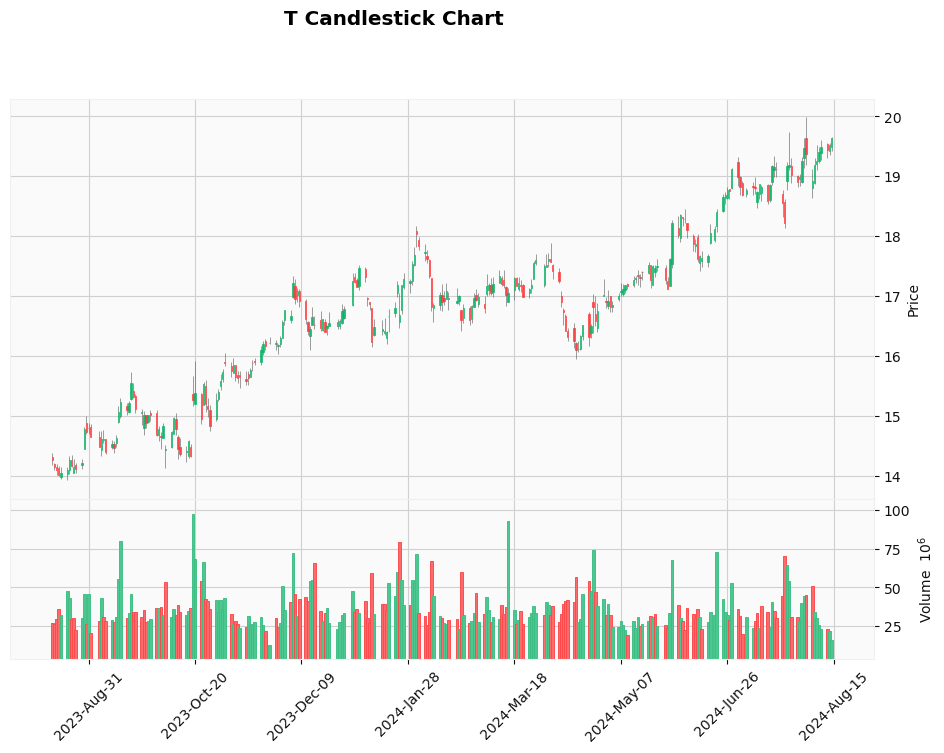

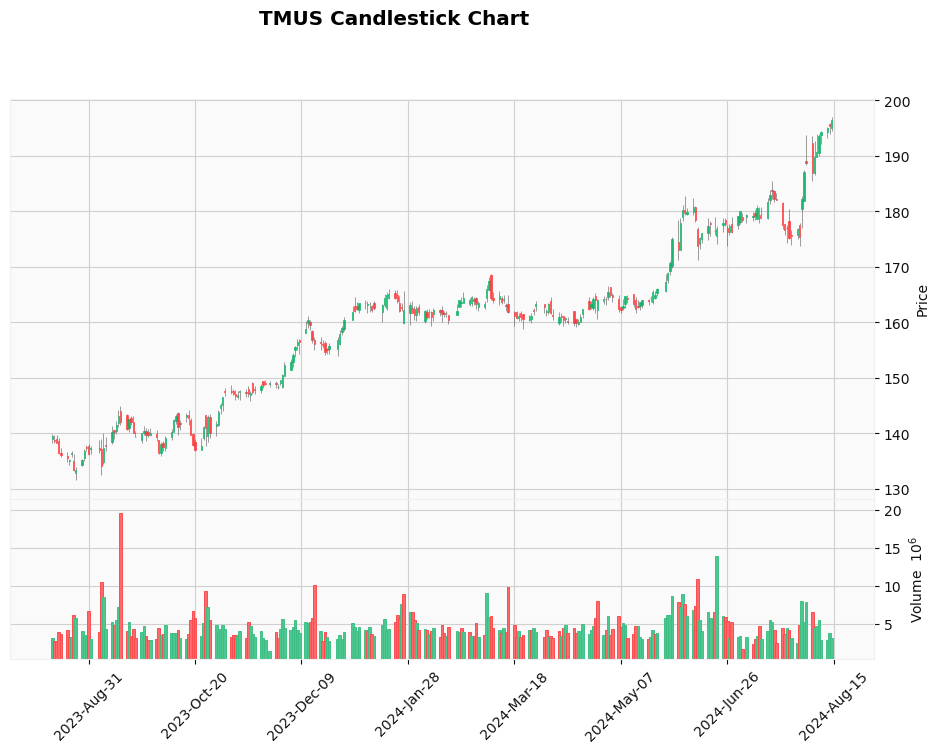

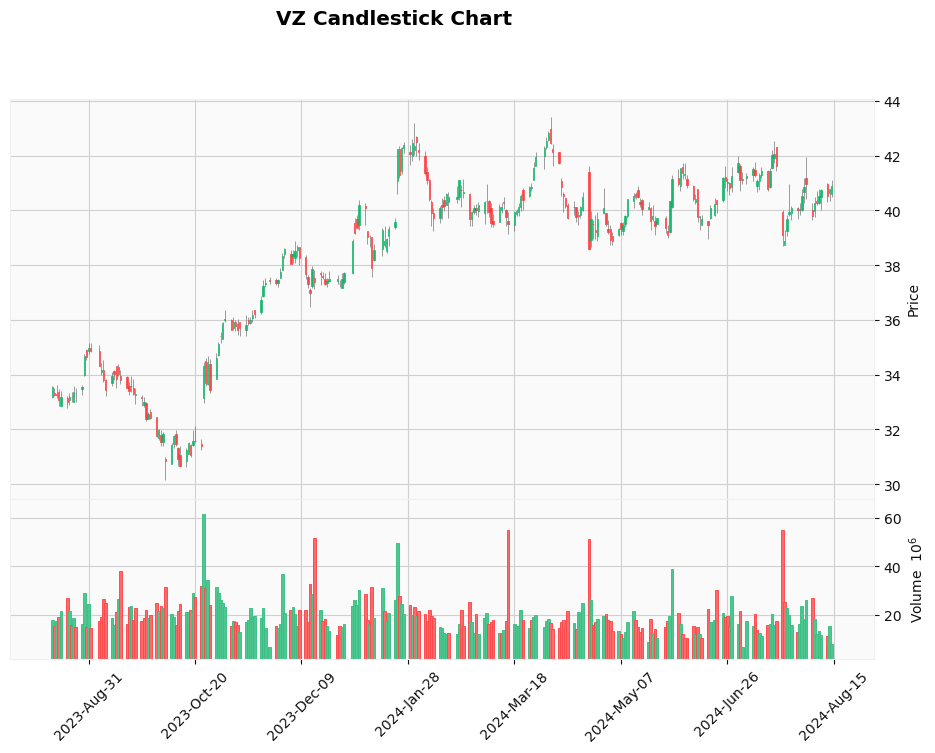

In [14]:
# Candlestick plots

for company in companies:
    # Prepare data for mplfinance
    plot_data = data[company].copy()
    
    # Check if columns have multiple levels
    if isinstance(plot_data.columns, pd.MultiIndex):
        plot_data.columns = plot_data.columns.droplevel()  # Remove multi-level column index
    
    # Ensure all required columns are present
    required_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
    if not all(col in plot_data.columns for col in required_columns):
        print(f"Skipping candlestick plot for {company} due to missing required columns")
        continue
 
    
    plot_data = plot_data[required_columns]

    
    # Create candlestick plot
    mpf.plot(plot_data, type='candle', volume=True, title=f'{company} Candlestick Chart',
             style='yahoo', figsize=(12, 8), show_nontrading=True, savefig=f'Images/{company}_candlestick_plot.png')

    mpf.plot(plot_data, type='candle', volume=True, title=f'{company} Candlestick Chart',
             style='yahoo', figsize=(12, 8), show_nontrading=True)

    
    

# Analysis:
# T-Mobile
- Trend: The chart for T-Mobile shows a strong uptrend with consistent higher highs and higher lows. The price action indicates a bullish      momentum, particularly with the recent spike above the $190 level. 
- Analysis: This suggests strong buying pressure, and the stock appears to be in a strong uptrend. If the trend continues, T-Mobile could be a favorable investment.

# Verizon
- Trend: Verizon’s chart shows a more neutral to slightly bullish trend. The stock experienced a significant drop around December 2023 but     has since recovered. However, the price action shows a lot of sideways movement with no clear, strong trend.
- Analysis: Verizon’s stock seems to be consolidating, with some volatility but no decisive trend. This might indicate caution, as the stock isn’t showing strong momentum in either direction.

# AT&T
- Trend: The chart for AT&T is showing a steady uptrend, similar to T-Mobile, but at a slower pace. The stock has been making higher lows      and higher highs, particularly since early 2024. 
- Analysis: This suggests a positive outlook for AT&T, though the upward momentum is not as strong as T-Mobile’s. It could still be a good investment if the trend continues.

# Conclusion
T-Mobile appears to be the strongest performer with a clear bullish trend.
AT&T is also trending upwards, though at a more gradual pace.
Verizon shows a neutral pattern with potential caution due to the lack of a clear trend.
Based on these trends, T-Mobile might be the best option for investment if you’re looking for a stock with strong upward momentum. AT&T could also be considered, while Verizon may require more observation for a clon.
r direction.


# Trading Volume Analysis
   - Visualization of trading volume over time for each stock.
   - Helps in understanding liquidity and investor interest



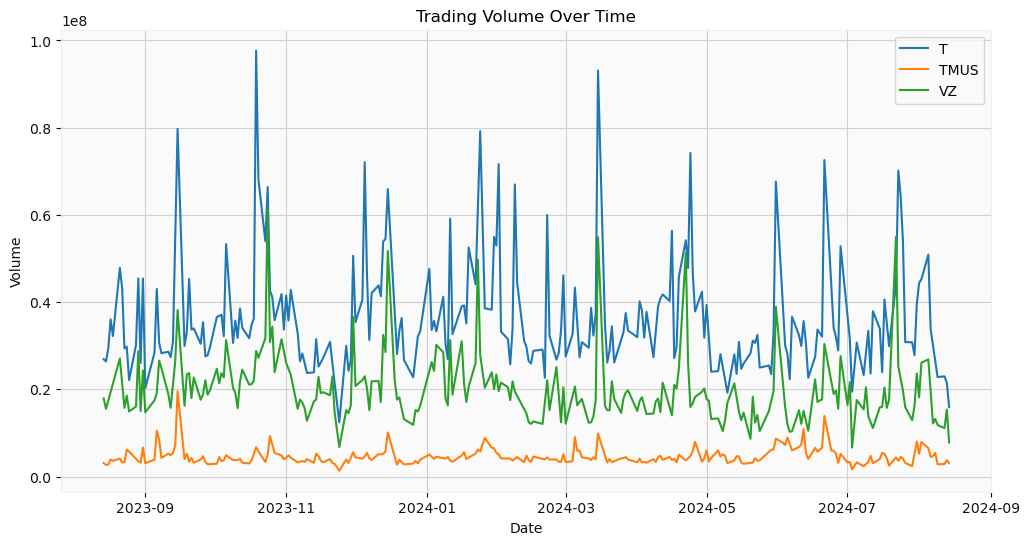

In [15]:
# plot Trading Volume Analysis
plt.figure(figsize=(12, 6))
for company in companies:
    plt.plot(data[company]['Volume'], label=company)
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()

# save to file
plt.savefig('Images/Volume.png')

plt.show()

# Conclusion: 
-	AT&T (T): High trading volume coupled with an uptrend might indicate strong market confidence in AT&T, making it a robust option for         investment.
-	Verizon (VZ): With moderate trading volume and a neutral price trend, Verizon might be considered less attractive unless there’s a clear     price breakout.
-	T-Mobile (TMUS): While T-Mobile has shown a strong price uptrend, its lower trading volumecould suggest that this movement is driven       y fewer, possibly more strategic, investor
s.
The decision to invest could depend on your risk tolerance and investment strategy. T-Mobile offers strong price performance but with lower volume, suggesting it might be a good pick for those looking for growth with potentially less volatility. AT&T’s combination of high trading volume and upward price trend suggests it might be a safer, more liquid investment. Verizon, with its moderate volume and neutral price movement, might be best approached with caution, especially until a clearer trend develops.


# Dividend and P/E ratio

- Retrieves the dividends rate and trailling price to earning ratio from yfinance.
- Calculate dividend yield by taking dividend rat e/ last stock price.



In [16]:

# Calculate the dividend and P/E ratio
for ticker in tickers:
    # Fetch the ticker data
    ticker_data = yf.Ticker(ticker)
    # Get the necessary data for dividend yield and P/E ratio calculation 
    last_price = df[ticker]['Close'].iloc[-1]
    # Get the necessary data for dividend yield and P/E 
    dividend_yield = ((ticker_data.info['dividendRate'])/last_price)*100
    pe_ratio = ticker_data.info['trailingPE']
    
    # Update the data dictionary with dividend yield and P/E ratio
    data[ticker]['Dividend_Yield'] = dividend_yield
    data[ticker]['P/E_Ratio'] = pe_ratio
    
    # Print the results
    print(f"Stock: {ticker}")
    print(f"Dividend Yield: {dividend_yield}")
    print(f"P/E Ratio: {pe_ratio}")
    print('\n')
    print("-------------------------------------------------")

Stock: T
Dividend Yield: 5.654610532121143
P/E Ratio: 11.281609


-------------------------------------------------
Stock: TMUS
Dividend Yield: 1.3232225188626474
P/E Ratio: 24.591991


-------------------------------------------------
Stock: VZ
Dividend Yield: 6.503667239026684
P/E Ratio: 15.37594


-------------------------------------------------


# Conclusion:

- VZ stands out for its relatively high dividend yield, making it potentially attractive for income-seeking investors.
- T has the lowest P/E ratio meaning it could be a bargain.

# Recommendation:

For income-oriented investors looking for steady dividends, VZ may be a suitable choice. 
and T could be a balanced choice for investors looking for a mix of dividends and possible bargain.


# Summary Statistics
- Compilation of key statistics including start price, end price, percent change, average daily return,volatility, P/E ratio and Dividend      yield.
- Provides a quick overview of each stock's performance.

In [17]:
# Summary Statistics
summary = pd.DataFrame({
    company: {
        'Start Price': data[company]['Close'].iloc[0],
        'End Price': data[company]['Close'].iloc[-1],
        'Percent_Change': (data[company]['Close'].iloc[-1] / data[company]['Close'].iloc[0] - 1) * 100,
        'Average Daily Return': data[company]['Daily_Return'].mean() * 100,
        'Volatility': volatility[company] * 100,
        'Dividend Yield': data[company]['Dividend_Yield'].iloc[-1],
        'P/E Ratio': data[company]['P/E_Ratio'].iloc[-1]
    } for company in companies
})

print(summary)

                              T        TMUS         VZ
Start Price           14.260000  139.500000  33.560001
End Price             19.629999  196.490005  40.900002
Percent_Change        37.657776   40.853051  21.871275
Average Daily Return   0.136008    0.139897   0.088453
Volatility            21.533074   14.014333  22.524089
Dividend Yield         5.654611    1.323223   6.503667
P/E Ratio             11.281609   24.591991  15.375940


In [18]:
# Conclusion and Recommendations
print("\nConclusion and Recommendations:")
best_performer = summary.loc['Percent_Change'].idxmax()
lowest_volatility = summary.loc['Volatility'].idxmin()
highest_return = summary.loc['Average Daily Return'].idxmax()

print(f"Based on the analysis:")
print(f"1. {best_performer} has shown the highest price appreciation over the past year.")
print(f"2. {lowest_volatility} has the lowest volatility, suggesting it might be the most stable investment.")
print("3. Consider the correlation between stocks for diversification purposes.")
print("4. VZ has the highest dividend yield and the lowest P/E ratio.")
print("5. T has the lowest P/E ratio.")
print(f"6. {highest_return} has the highest return over the past year.")
print("\nRecommendation: A balanced portfolio might include a mix of these stocks, with emphasis on")
print(f"{best_performer} for growth potential and {lowest_volatility} for stability. However, this")
print("should be considered in the context of the investor's risk tolerance and overall investment strategy.")
print("Monitor trading volumes for liquidity concerns.")
print("------------------------------------------------------------------------------------------------------")


Conclusion and Recommendations:
Based on the analysis:
1. TMUS has shown the highest price appreciation over the past year.
2. TMUS has the lowest volatility, suggesting it might be the most stable investment.
3. Consider the correlation between stocks for diversification purposes.
4. VZ has the highest dividend yield and the lowest P/E ratio.
5. T has the lowest P/E ratio.
6. TMUS has the highest return over the past year.

Recommendation: A balanced portfolio might include a mix of these stocks, with emphasis on
TMUS for growth potential and TMUS for stability. However, this
should be considered in the context of the investor's risk tolerance and overall investment strategy.
Monitor trading volumes for liquidity concerns.
------------------------------------------------------------------------------------------------------


#  Key Findings: 

1. Best Performer: The analysis identifies the stock with the highest price appreciation over the year.
2. Lowest Volatility: The stock with the lowest volatility is highlighted, indicating potentially lower risk.
3. Correlation Insights: The correlation analysis reveals how the stocks move in relation to each other,
   which is crucial for portfolio diversification.
4. Volume Trends: The trading volume analysis provides insights into the liquidity of each stock.
5. Dividends: The correlation analysis between company dividend yields can tell us what stocks have the highest pay outs. A look at the P/E     ratio will tell us if the stock is a possible bargain.

## Recommendations

Based on the analysis, the script provides a basic recommendation for portfolio composition, considering both growth potential and stability. However, it emphasizes that these recommendations should be considered in the context of an investor's risk tolerance and overall investment strategy. If were are not looking for long term invesment reference dividend yields and P/E ratios.

## Limitations and Future Improvements

- The analysis is based on historical data and does not predict future performance.
- Additional factors such as company fundamentals, market conditions, external factors like market trends or ne          ws events and economic are indicators that could be incorporated for a more comprehensive analysis.
- The time frame could be extended or shortened to observe different trends.


